<a href="https://colab.research.google.com/github/ReynaldiJ/portfolio/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#generate data

from sklearn.datasets import make_blobs

x, y_true = make_blobs(n_samples=1000, n_features=4, centers=4, cluster_std=3, random_state=20)

<Axes: >

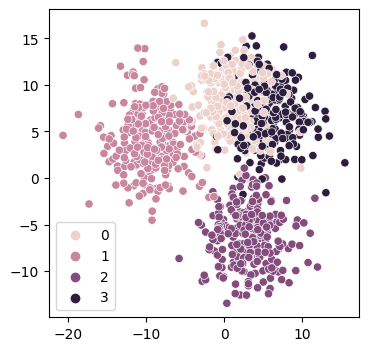

In [ ]:
#visualize

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
sns.scatterplot(ax=ax, x=x[:,0], y=x[:,1], hue = y_true)

In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(x_standard)
x_pca = pca.transform(x_standard)

<Axes: >

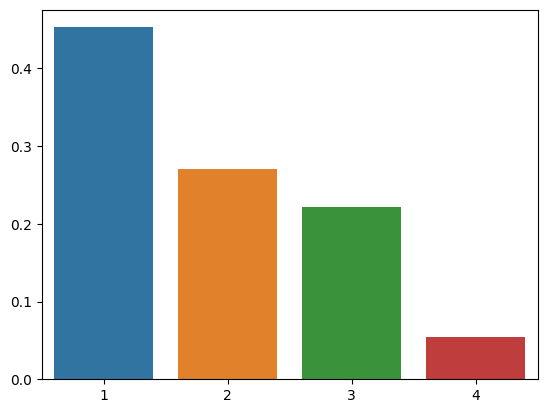

In [ ]:
variance = pca.explained_variance_ratio_
sns.barplot(x=list(range(1,len(variance)+1)), y=variance)

In [ ]:
variance

array([0.4529891 , 0.27093134, 0.22207964, 0.05399992])

<Axes: >

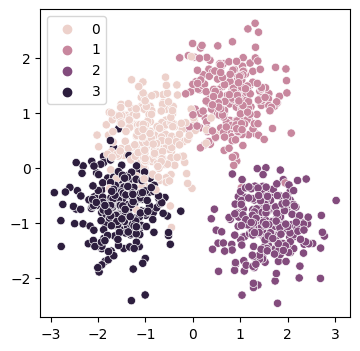

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
sns.scatterplot(ax=ax, x=x_pca[:,0], y=x_pca[:,1], hue = y_true)

In [ ]:
#K Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca[:,0:3])
y_kmeans_pca_3 = kmeans.predict(x_pca[:,0:3])

kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca[:,0:2])
y_kmeans_pca_2 = kmeans.predict(x_pca[:,0:2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

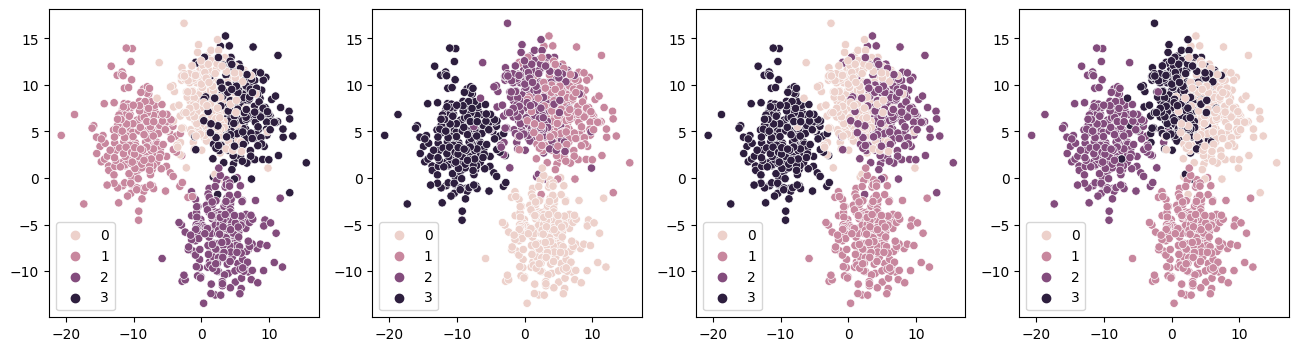

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
fig.set_figheight(4)
fig.set_figwidth(16)
sns.scatterplot(ax=ax1, x=x[:,0], y=x[:,1], hue = y_true)
sns.scatterplot(ax=ax2, x=x[:,0], y=x[:,1], hue = y_kmeans)
sns.scatterplot(ax=ax3, x=x[:,0], y=x[:,1], hue = y_kmeans_pca_3)
sns.scatterplot(ax=ax4, x=x[:,0], y=x[:,1], hue = y_kmeans_pca_2)

In [ ]:
#Wine Case

df_wine = pd.read_excel('/content/wine.data.xlsx')
df_wine.head()

In [ ]:
df_wine.describe()

In [ ]:
df_wine.info()

In [ ]:
sns.boxplot(data = df_wine, x='Class', y='Alcohol')

In [ ]:
sns.scatterplot(data = df_wine, x='Malic acid', y='Alcohol', hue='Class')

In [ ]:
x = df_wine.drop('Class', axis=1)
y = df_wine['Class']

x_standard = scaler.fit_transform(x)

<Axes: >

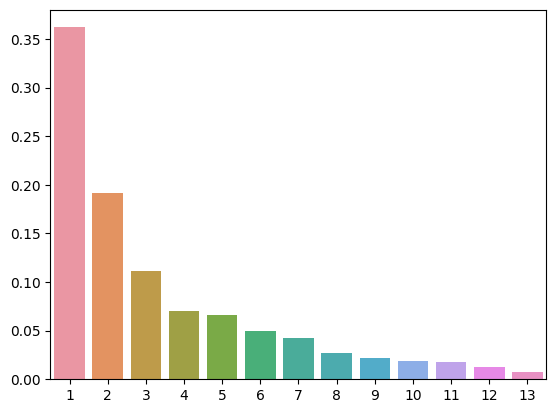

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(x_standard)
x_pca = pca.transform(x_standard)
variance = pca.explained_variance_ratio_
sns.barplot(x=list(range(1,len(variance)+1)), y=variance)

In [ ]:
variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

<Axes: >

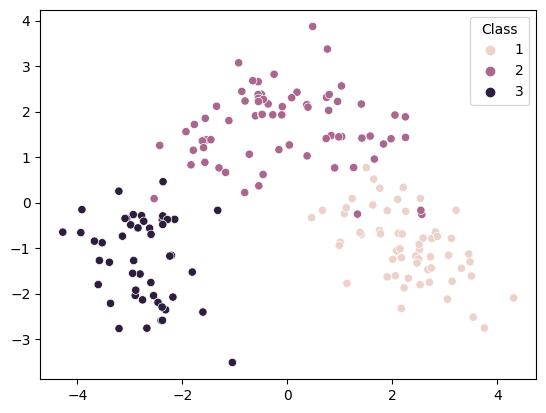

In [ ]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y)